# Lepton $p_T$ Scale

In [1]:
import ROOT as r

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

import CMS_lumi, tdrstyle

tdrstyle.setTDRStyle()

Welcome to JupyROOT 6.08/05


<ROOT.TStyle object ("tdrStyle") at 0x5d86260>

In [2]:
fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_05_15_04h15/HaddedFiles/Hadds_for_BkgEstimation/WWTree_Signal_aQGC.root")

fin_sys = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_MuonPtScale_2018_06_11_10h58/HaddedFiles/Hadds_for_BkgEstimation/WWTree_Signal_aQGC.root")


treeIn = fin.Get("otree")

treeIn_sys = fin_sys.Get("otree")


# Define the cuts
cutString_Signal         =  "(LHEWeight[1081]/LHEWeight[0])*wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) &&(PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8>600) && ((abs(ZeppenfeldWL_type0)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0>1.0))"


cutString_Signal_LEP_Up         =  "(LHEWeight[1081]/LHEWeight[0])*wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2<0 && l_pt1_Up>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) &&(PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8_LEP_Up>600) && ((abs(ZeppenfeldWL_type0_LEP_Up)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0_LEP_Up>1.0))"

cutString_Signal_LEP_Down         =  "(LHEWeight[1081]/LHEWeight[0])*wSampleWeight*35867.06*btag0Wgt*genWeight*trig_eff_Weight*id_eff_Weight*pu_Weight*((type==0||type==1) && (l_pt2_Down<0 && l_pt1_Down>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (((type==0)&&(pfMET_Corr>50)) || ((type==1)&&(pfMET_Corr>80))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((PuppiAK8_jet_mass_so_corr>65) &&(PuppiAK8_jet_mass_so_corr<105)) && (mass_lvj_type0_PuppiAK8_LEP_Down>600) && ((abs(ZeppenfeldWL_type0_LEP_Down)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && ((abs(ZeppenfeldWH)/abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta))<0.3) && (BosonCentrality_type0_LEP_Down>1.0))"

### Get V+jet histogram in signal, lower side-band and in whole side-band (low as well as high) region

In [3]:
hSignal_4bin = r.TH1D("hSignal_4bin","",4,600,2500)
hSignal_4bin.SetMarkerColor(1)
hSignal_4bin.SetLineColor(1)
hSignal_4bin.SetLineWidth(3)
hSignal_4bin.SetMarkerSize(1)

hSignal_4bin_up = r.TH1D("hSignal_4bin_up","",4,600,2500)
hSignal_4bin_up.SetMarkerColor(2)
hSignal_4bin_up.SetLineColor(2)
hSignal_4bin_up.SetLineWidth(3)
hSignal_4bin_up.SetMarkerSize(1)

hSignal_4bin_down = r.TH1D("hSignal_4bin_down","",4,600,2500)
hSignal_4bin_down.SetMarkerColor(3)
hSignal_4bin_down.SetLineColor(3)
hSignal_4bin_down.SetLineWidth(3)
hSignal_4bin_down.SetMarkerSize(1)

treeIn.Draw("mass_lvj_type0_PuppiAK8>>hSignal_4bin",cutString_Signal)

treeIn_sys.Draw("mass_lvj_type0_PuppiAK8_LEP_Up>>hSignal_4bin_up",cutString_Signal_LEP_Up)


treeIn_sys.Draw("mass_lvj_type0_PuppiAK8_LEP_Down>>hSignal_4bin_down",cutString_Signal_LEP_Down)


90818L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [4]:
a = 100*(hSignal_4bin_up.Integral()-hSignal_4bin.Integral())/hSignal_4bin.Integral()
b = 100*(hSignal_4bin.Integral()-hSignal_4bin_down.Integral())/hSignal_4bin.Integral()

print "nominal yield = ",hSignal_4bin.Integral()
print "up yield = ", hSignal_4bin_up.Integral(), " (",str(round(a, 2)),"%)"
print "Down yield = ", hSignal_4bin_down.Integral(), " (",str(round(b, 2)),"%)"

nominal yield =  3018.7804062
up yield =  3011.91204213  ( -0.23 %)
Down yield =  3022.51703453  ( -0.12 %)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TH1D::SaveAs>: ROOT file WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale_Nominal.root has been created
Info in <TH1D::SaveAs>: ROOT file WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale_Up.root has been created
Info in <TH1D::SaveAs>: ROOT file WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale_Down.root has been created


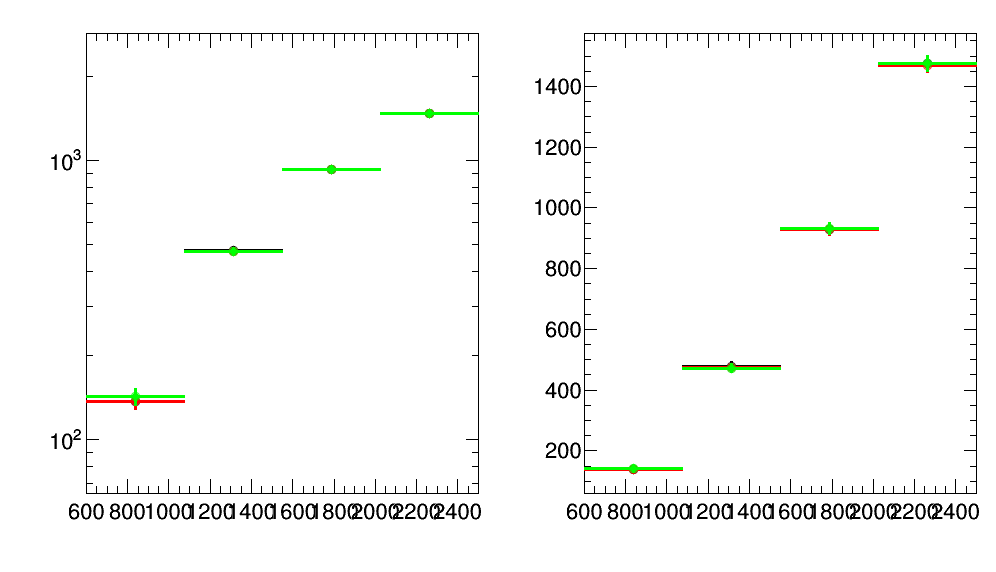

In [5]:
c1 = r.TCanvas("c1", "canvas", 1000, 600)
c1.SetLogy()
c1.Divide(2,1)
c1.cd(1)
r.gPad.SetLogy()
hSignal_4bin.Draw()
hSignal_4bin_up.Draw("same")
hSignal_4bin_down.Draw("same")

c1.cd(2)
hSignal_4bin.Draw()
hSignal_4bin_up.Draw("same")
hSignal_4bin_down.Draw("same")

c1.Draw()

hSignal_4bin.SaveAs("WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale_Nominal.root")
hSignal_4bin_up.SaveAs("WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale_Up.root")
hSignal_4bin_down.SaveAs("WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale_Down.root")

In [6]:
%jsroot on

c1 = r.TCanvas("c1", "canvas", 1000, 600)
hSignal_4bin.Draw()
hSignal_4bin_up.Draw("same")
hSignal_4bin_down.Draw("same")

leg = r.TLegend(0.65,0.95,.95,0.65)

leg.AddEntry(hSignal_4bin,"Nominal")
leg.AddEntry(hSignal_4bin_up,"Up")
leg.AddEntry(hSignal_4bin_down,"Down")

hSignal_4bin.GetXaxis().SetTitle("M_{WW} (GeV)")
hSignal_4bin.GetYaxis().SetTitle("Events")



leg.Draw()
c1.Draw()
c1.SaveAs("WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale.png")
c1.SaveAs("WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale.pdf")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale.png has been created
Info in <TCanvas::Print>: pdf file WVchannel_aQGCSignal_Wgt1081_Lepton_pTScale.pdf has been created
